In [28]:
from sklearn.datasets import load_digits #digits classification dataset from standard sklearn datasets
# import pylab as pl #legacy пример из книги. pylab использовать не стоит из-за конфликтов
import matplotlib.pyplot as plt
digits = load_digits()

# from sklearn.cross_validation import train_test_split they have moved it to model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

<Figure size 432x288 with 0 Axes>

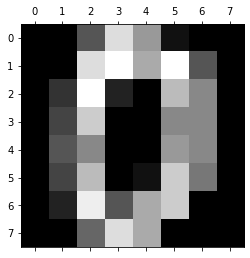

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [29]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()
digits.images[0]

In [31]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [33]:
y = digits.target

n_samples = len(digits.images)
X = digits.images.reshape((n_samples), -1)

In [34]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

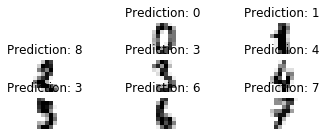

In [39]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(6, 3, index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
accuracy_score(y_test, predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.70      0.91      0.79        43
           2       0.95      0.45      0.62        44
           3       0.83      0.87      0.85        45
           4       0.94      0.82      0.87        38
           5       0.98      0.90      0.93        48
           6       1.00      0.98      0.99        52
           7       0.76      0.98      0.85        48
           8       0.55      0.79      0.65        48
           9       1.00      0.64      0.78        47

    accuracy                           0.83       450
   macro avg       0.87      0.83      0.83       450
weighted avg       0.87      0.83      0.83       450

